In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score


In [34]:
dataset = pd.read_csv("Advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [35]:
X = dataset[['TV','Radio','Newspaper']].values
y = dataset['Sales'].values

In [36]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [37]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
degrees = range(1, 10)
mse_test, bic_values, cv_errors = [], [], []

n_train = len(y_train)

In [40]:
# --- Boucle sur les degrés ---
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # 🔹 MSE sur test
    y_test_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_test_pred)
    mse_test.append(mse)
    
    # 🔹 BIC
    k = X_train_poly.shape[1]
    y_train_pred = model.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_train_pred)
    bic = n_train * np.log(mse_train) + k * np.log(n_train)
    bic_values.append(bic)
    
    # 🔹 Validation croisée
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))

In [41]:
# --- Sélection des meilleurs degrés ---
best_mse_deg = degrees[np.argmin(mse_test)]
best_bic_deg = degrees[np.argmin(bic_values)]
best_cv_deg = degrees[np.argmin(cv_errors)]

In [42]:
print(f"Degré optimal selon MSE (test) : {best_mse_deg}")
print(f"Degré optimal selon BIC : {best_bic_deg}")
print(f"Degré optimal selon Validation Croisée : {best_cv_deg}")


Degré optimal selon MSE (test) : 2
Degré optimal selon BIC : 2
Degré optimal selon Validation Croisée : 2


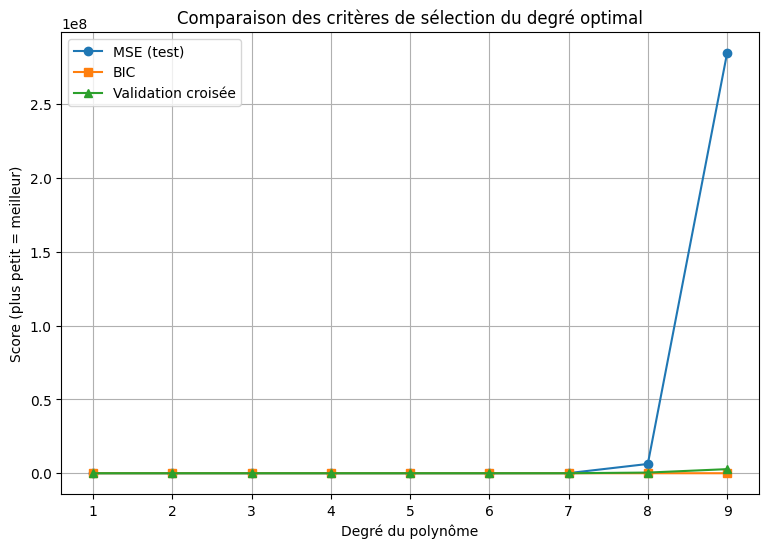

In [43]:

# --- Visualisation comparée ---
plt.figure(figsize=(9, 6))
plt.plot(degrees, mse_test, 'o-', label='MSE (test)')
plt.plot(degrees, bic_values, 's-', label='BIC')
plt.plot(degrees, cv_errors, '^-', label='Validation croisée')
plt.xlabel("Degré du polynôme")
plt.ylabel("Score (plus petit = meilleur)")
plt.title("Comparaison des critères de sélection du degré optimal")
plt.legend()
plt.grid(True)
plt.show()

### Degré 9 : À ÉVITER ABSOLUMENT (surapprentissage massif)
### Degrés 1-8 : Tous acceptables selon ce graphique ✓

In [44]:
# Modèle final avec degré 2
poly_final = PolynomialFeatures(degree=2)
X_train_poly_final = poly_final.fit_transform(X_train)
X_test_poly_final = poly_final.transform(X_test)

model_final = LinearRegression()
model_final.fit(X_train_poly_final, y_train)

LinearRegression()

In [45]:
# Évaluation
y_pred = model_final.predict(X_test_poly_final)
r2_final = r2_score(y_test, y_pred)
mse_final = mean_squared_error(y_test, y_pred)

print(f"R² Score : {r2_final:.4f}")
print(f"MSE : {mse_final:.4f}")
print(f"RMSE : {np.sqrt(mse_final):.4f}")

R² Score : 0.9533
MSE : 1.4425
RMSE : 1.2011


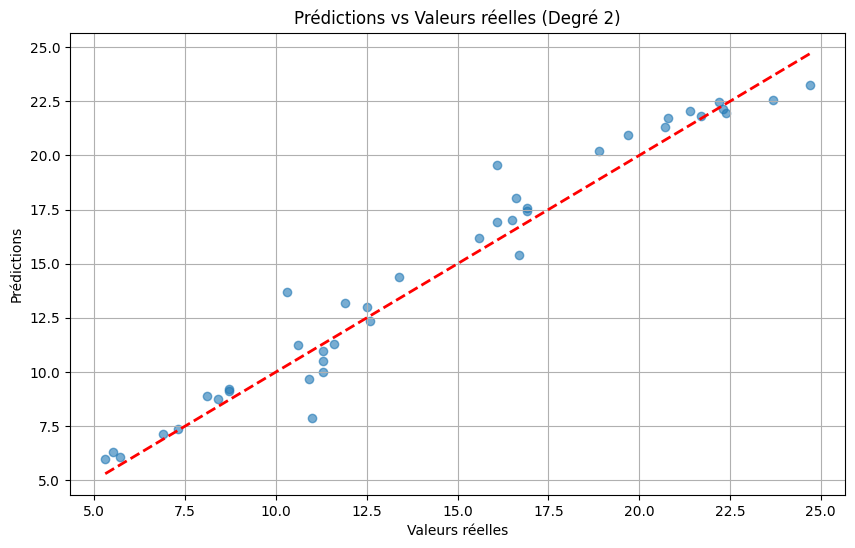

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles (Degré 2)")
plt.grid(True)
plt.show()

In [47]:
# Obtenir les noms des features
feature_names = poly_final.get_feature_names_out(['TV', 'Radio', 'Newspaper'])

# Créer un DataFrame avec les coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_final.coef_
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print("\nCoefficients du modèle :")
print(coef_df)


Coefficients du modèle :
           Feature  Coefficient
1               TV     0.076216
7          Radio^2     0.001448
5         TV Radio     0.000419
8  Radio Newspaper     0.000165
9      Newspaper^2     0.000085
0                1     0.000000
6     TV Newspaper    -0.000026
4             TV^2    -0.000106
3        Newspaper    -0.001920
2            Radio    -0.031984


In [ ]:
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

print(f"R² régression simple : {r2_score(y_test, y_pred_simple):.4f}")
print(f"R² régression polynomiale (degré 2) : {r2_final:.4f}")

R² régression simple : 0.9059
R² régression polynomiale (degré 2) : 0.9533
